<a href="https://colab.research.google.com/github/FerryJulyo/PCVK_Genap_2021/blob/main/UAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
from google.colab import drive

# Acessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

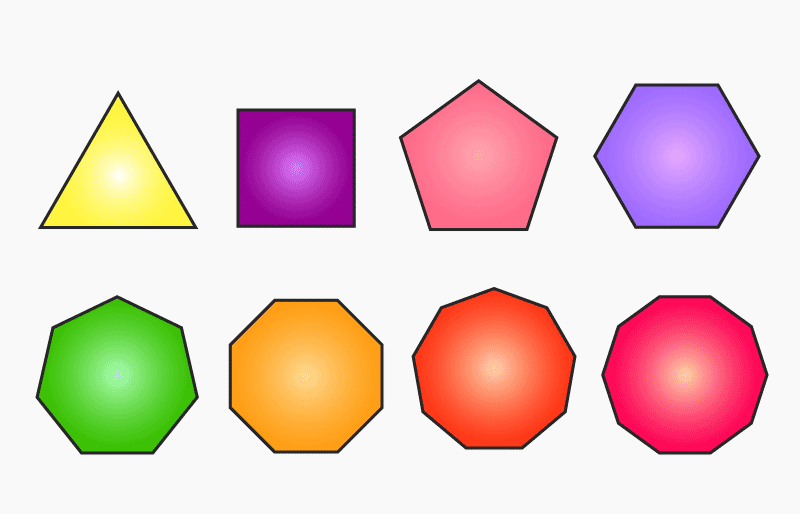

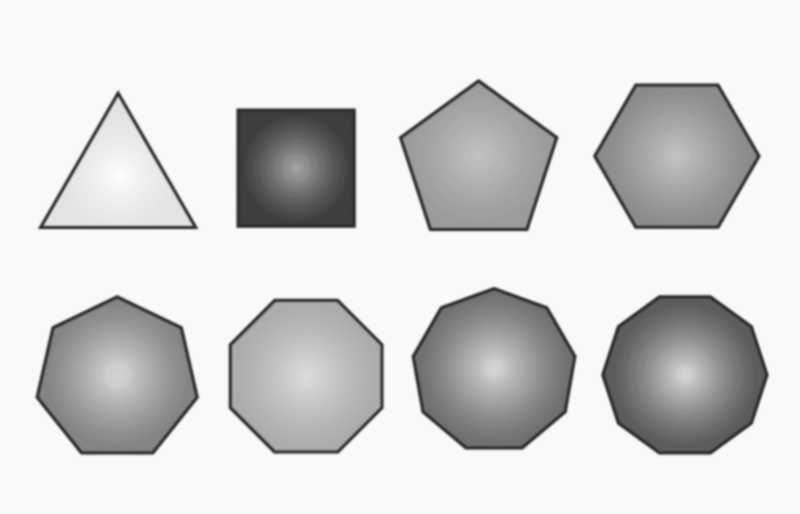

In [121]:
# Mengambil image :
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/types-of-polygons1.png')
cv2_imshow(img)

# Mengconvert image ke Grayscale
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menambahkan Gaussian Blur(5,5)
blurred = cv2.GaussianBlur(imgGrey, (5,5), 0)


cv2_imshow(blurred)

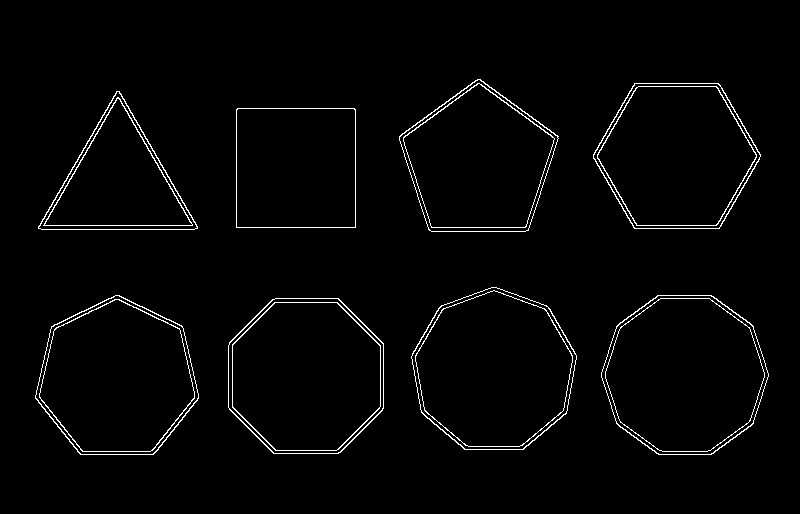

In [122]:
# Menentukan garis tepi dengan Canny Edge
edged = cv2.Canny(blurred, 30, 120)
cv2_imshow(edged)

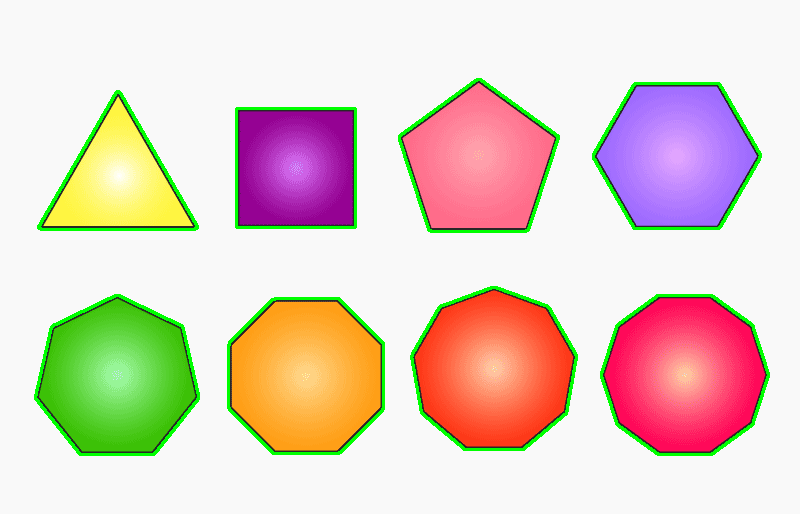

In [123]:
# Mencari Kontur dari hasil canny edge dan mengaplikasikannya ke image asli
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)
cv2_imshow(draw)

Persegi 1 mempunyai 120 Lebar dan 120 Tinggi


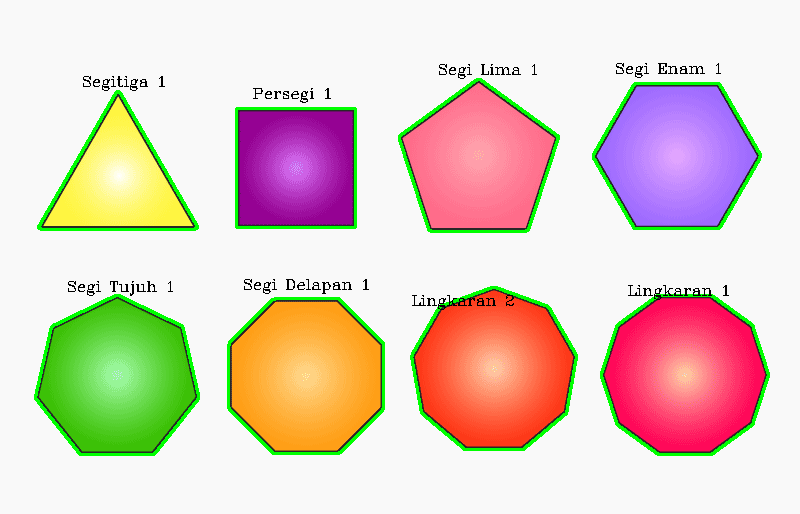

Jumlah bangun yang ada 1 segitiga, 1 kotak, 0 persegi panjang, 1 segi lima, 1 segi enam, 1 segi tujuh, 1 segi delapan, 2 bundar pada gambar ini dengan total 8 bangun bentuk


In [124]:
# Inisiasi bangun bentuk yang ada
segitiga = 0
kotak = 0
persegiPanjang = 0
segiLima = 0
segiEnam = 0
segiTujuh = 0
segiDelapan = 0
bulat = 0

for cnts in cnts:
    approx = cv2.approxPolyDP(cnts, 0.02* cv2.arcLength(cnts, True), True)
    draw2 = cv2.drawContours(img.copy(), cnts, -1, (0,0,0), 2)
    
    x = approx.ravel()[0] # kordinat x untuk menempatkan text
    y = approx.ravel()[1] # kordinat y untuk menempatkan text
    if len(approx) == 3: # 3 sudut(Segitiga)
        segitiga += 1 # menghitung jumlah segitiga
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segitiga {}".format(segitiga), (x - 35, y - 5), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx) == 4:

        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05: # ratio tinggi dan lebar
            kotak += 1 # menghitung jumlah kotak
            print("Persegi {} mempunyai {} Lebar dan {} Tinggi".format(kotak, w, h)) # tampilkan tinggi dan lebar
            # Masukkan text disekitar bangun bentuk
            # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
            cv2.putText(img, "Persegi {}".format(kotak), (x + 15, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
          
        else:
            persegiPanjang += 1 # menghitung jumlah persegi
            print("Persegi panjang {} mempunyai {} Lebar dan {} Tinggi".format(persegiPanjang, w, h)) # tampilkan tinggi dan lebar
            # Masukkan text disekitar bangun bentuk
            # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
            cv2.putText(img, "Persegi panjang {}".format(persegiPanjang), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
   
    elif len(approx) == 5: #5 sudut(Segi lima)
        segiLima += 1 # menghitung jumlah segiLima
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Lima {}".format(segiLima), (x - 40, y - 5), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx) == 6:  # 6 sudut(Segi enam)
        segiEnam += 1 # Hitung jumlah Segi enam
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Enam {}".format(segiEnam), (x - 20, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

    elif len(approx) == 7:  # 7 sudut(Segi tujuh)
        segiTujuh += 1 # Hitung jumlah segi tujuh
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Tujuh {}".format(segiTujuh), (x + 15, y - 35), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

    elif len(approx) == 8:  # 7 sudut(Segi delapam)
        segiDelapan += 1 # Hitung jumlah segi delapan
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Delapan {}".format(segiDelapan), (x - 30, y - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    else: # Lainnya akan dianggap sebagai lingkaran
        bulat +=1 # menghitung jumlah lingkaran
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Lingkaran {}".format(bulat), (x - 30, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))

total = segitiga + kotak + persegiPanjang + segiLima + segiEnam + segiTujuh + segiDelapan + bulat  # hitung seluruh jumlah bangun bentuk

cv2_imshow(img)
print("Jumlah bangun yang ada {} segitiga, {} kotak, {} persegi panjang, {} segi lima, {} segi enam, {} segi tujuh, {} segi delapan, {} bundar pada gambar ini dengan total {} bangun bentuk".format(segitiga,kotak,persegiPanjang,segiLima,segiEnam,segiTujuh,segiDelapan,bulat,total))